# Unsupervised Machine Learning I - PCA


https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

https://stackoverflow.com/questions/24414540/rpy2-error-wac-a-mole-r-user-not-defined

http://revolution-computing.typepad.com/.a/6a010534b1db25970b01b7c80c6f89970b-pi

**Brull Borràs, Pere Miquel**

## Introduction

In this notebook we are going to explore a wide used technique belonging to the Unsupervised Machine Learning family: the **Principal Component Analysis** or PCA. We understand *Unsupervised Machine Learning* as a set of tools for explanatory analysis used for exploiting data in search for inner structures and relations that may help to understanding the dataset. The main idea here is that there is not a result that one expects to obtain and are techniques used more as a path to follow rather than an end to reach. In contraposition to this, we find the so-called predictive branch of Machine Learning algorithms: *Supervised Machine Learning*, which consists of finding a set of values as close as possible to the reality using models that are fed with these targets for different sets of data.

Before going in-depth and diving into the algorithm itself there is one preliminar subject left to talk about: Univariate Analysis vs. Multivariate Analysis. In order to make this explanation easier let me use the widely known and used Titanic dataset as an example. The objective of that dataset is learning classification algorithms that can predict whether an individual would have survived or not the Titanic sinking. That divides the dataset into two main parts: the target variable {Survival: yes or no} and explanatory variables {Age, Fare, Social class...}. If my only interest lies on describing the distribution behind the Age feature, that would fall behind the Univariate Analysis, as I focus into one and only variable. However, I am rather interested in exploring the relations in the data and how variables interact among them and with my target value: This techniques rely on Multivariate Analysis, and PCA is an algorithm to master to achieve better results to this end. 

## PCA from above

Data is information, and this information is reflected in the **variability** of my data: the inertia of the cloud of points respect to the mass center *G*. If I only have at my disposal subjects who did not survive the Titanic catastrophe, how am I supposed to learn what differentiates them from those who did? Problems appear though when the dimensionality of the data gets higher and observations noisy. Principal Component Annalysis was invented by the American statistician Harold Hotelling (1895-1973) and helps us overcome these issues decomposing the highly multivariate dataset into an **orthogonal subspace** while following a rule: Retention of the maximum of the original cloud information i.e: maximizing the variance after the projection.

The procedure behind the method is rather simple. Let $X$ be the standarized data matrix (regarding that I am interested in giving the same relevance to all variables), we want to find the direction $u_i $ so that when projecting all points on that direction, the projected inertia is maximized. This maximization problem can be simplified to the diagonalization of the correlation matrix $R$ of our data, from which we will obtain $\lambda_1,\ldots,\lambda_p$ as the *eigenvalues* of the *eigenvectors* $u_1,\ldots,u_p$, where $\lambda_1>\lambda_2>\ldots\lambda_p$. The eigenvectors are the vector that did not change direction during the transformation, and the eigenvalues, which correspond to the eigenvectors length, represent the amount of variance retained in that direction, so that we can compute the percentage of information explained by each eigenvector $u_j$ as $\frac{\lambda_j}{\sum^p_i \lambda_i}$. 

Thus, Principal Components are the top explanatory eigenvectors. However, one must keep in mind that there are no closed rules when chosing the appropriate number of principal components, but heuristics and subjective opinions. And now comes the question: Why should I use PCA?

- Dimensionality reduction helps in visualizing data relations.
- Merging variables together eases the finding of latent concepts.
- Preservation of the systematic part of the data and discarding noise: part of the data that cannot be explained and is present by chance.



## PCA from inside

We will perform a PCA in python using the UCI handwritten digits dataset, distributed as part of sklearn. 1797 handwritten digits from 44 persons were scanned and fit into an 8x8 pixel box (i.e 64 components), where pixels represent the pressure of the writting.

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab as pl # combines matplotlib and numpy
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
scale = StandardScaler()

digits = load_digits()
data = load_digits().data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

An example of our data would be:

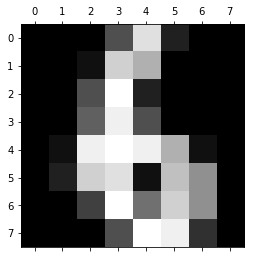

In [11]:
pl.gray()
pl.matshow(digits.images[34]) 
plt.show() 

We have 10 different labels: 0,1,...,9. Note how in this case I am not interested in standarizing the data, as I want to give more importance to the pixels that are actually informed rather than those with value 0 in the edges of the box.

In [23]:
pca = PCA(n_components=10)
proj = pca.fit(data).transform(data)

print('Explained variance ratio of the first two components: %s' % str(pca.explained_variance_ratio_[:2]))
print('Sum of explained variance: %s' % str(sum(pca.explained_variance_ratio_[:2])))

Explained variance ratio of the first two components: [0.14890594 0.13618771]
Sum of explained variance: 0.2850936482323364


Observe how each next eigenvector retains less information than the previous one:

In [13]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_) #eigenvalues
#components_ eigenvectors

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661369 0.03353242 0.03078794]
[567.0065665  542.25185421 504.63059419 426.11767592 353.33503066
 325.82035267 305.26156769 281.16018855 269.06954608 257.82343149]


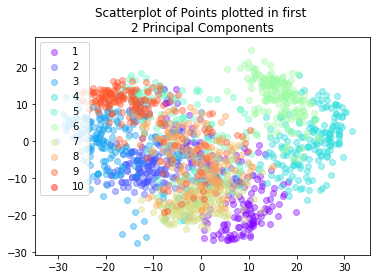

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = cm.rainbow(np.linspace(0, 1, 10))
for c, i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], labels):
    ax.scatter(proj[labels == i, 0], 
                proj[labels == i, 1],     
                c=c, alpha = 0.4, label=i)
plt.legend(loc='upper left');
plt.title('Scatterplot of Points plotted in first \n'
    '2 Principal Components')
plt.show()

What this plot shows here is that while there seems to be some separation between classes in the first two components, it remains hard to classify them correctly. How many components to choose?

Text(0,0.5,'Cumulative explained variance')

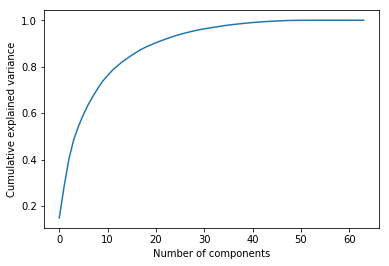

In [6]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Text(0,0.5,'explained_variance_')

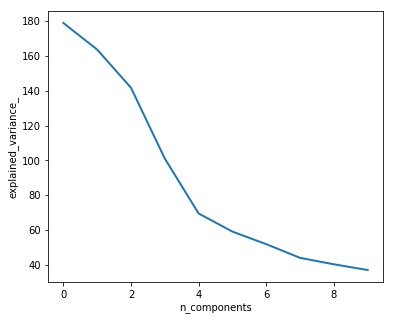

In [24]:
plt.figure(1, figsize=(6, 5))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

## Churn Data

In [57]:
fields = ['Total_activo', 'Total_Plazo','Total_Inversion','Total_Seguros','Total_Vista','Baja']
df = pd.read_csv('churn.txt', sep=' ', usecols=fields)
select = [x for x in df.columns if x != 'Baja']

df[select] =  scale.fit_transform(df[select].as_matrix())

c:\users\usuario\miniconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0,0.5,'explained_variance_')

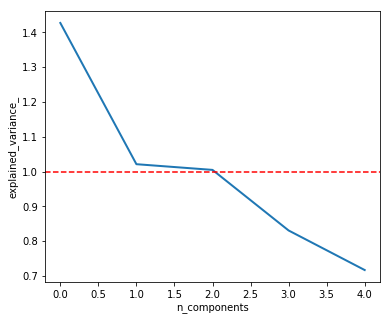

In [58]:
pca = PCA().fit(df[select])

plt.figure(1, figsize=(6, 5))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axhline(y=1, color='r', linestyle='--')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

Using the elbow rule on the screeplot, it seems that 3 components might be enough to explain the most part of the information in the data.

In [74]:
baja_si = df.loc[df['Baja'] == 'Baja SI', select]
baja_no = df.loc[df['Baja'] == 'Baja NO', select]

pca = PCA(n_components=3)
print(np.concatenate((baja_si, baja_no)).shape)

PCA = pca.fit_transform(np.concatenate((baja_si,baja_no)))

(2000, 5)


TypeError: 'type' object is not subscriptable

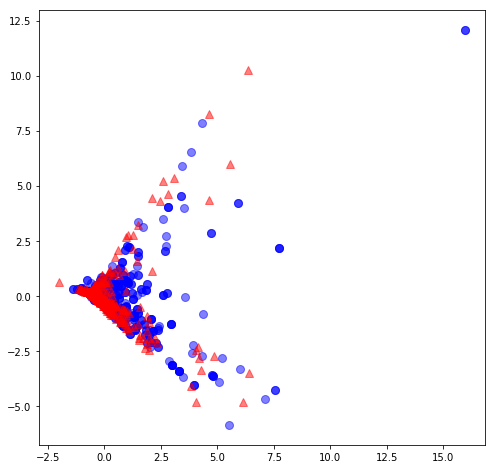

In [118]:
fig = plt.figure(figsize=(8,8))
plt.rcParams['legend.fontsize'] = 10

plt.plot(PCA[1:baja_si.shape[0], 0], PCA[1:baja_si.shape[0], 1], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
plt.plot(PCA[baja_si.shape[0]:, 0], PCA[baja_si.shape[0]:, 1], '^', markersize=8, alpha=0.5, color='red', label='fives')

  scale=21)
plt.title('Samples for class Baja SI and class Baja NO in the PCA space')
plt.show()

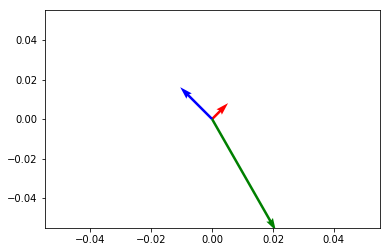

[ 1 -2  4]


In [109]:
V = np.array([[1,1],[-2,2],[4,-7]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()
print(V[:,0])

[-0.09970339  0.51103636]
[ 0.03402154 -0.55025385]
[ 0.97486549 -0.04663047]


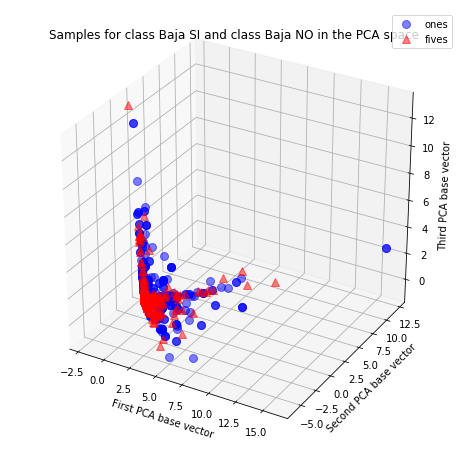

In [78]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

ax.plot(PCA[1:baja_si.shape[0], 0], PCA[1:baja_si.shape[0], 1],
        PCA[1:baja_si.shape[0], 2], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(PCA[baja_si.shape[0]:, 0], PCA[baja_si.shape[0]:, 1],
        PCA[baja_si.shape[0]:, 2], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class Baja SI and class Baja NO in the PCA space')
ax.legend(loc='upper right')
ax.set_xlabel('First PCA base vector')
ax.set_ylabel('Second PCA base vector')
ax.set_zlabel('Third PCA base vector')
plt.show()

In [94]:
import pyfinance